In [1]:
import cv2
import numpy as np
import skimage as ski
from scipy.misc import imread, imsave, imresize

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_ubyte
from IPython.display import Image
%matplotlib inline

2.1

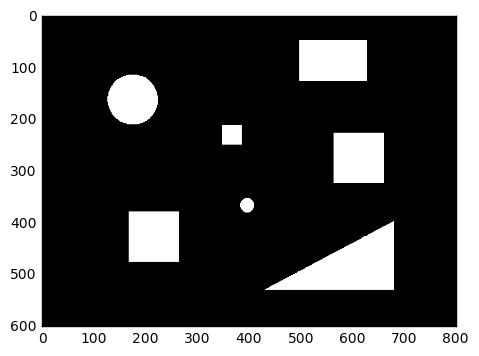

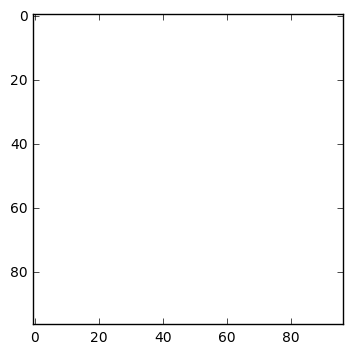

numpy.ndarray

In [15]:
img1 = cv2.imread('image1.tif')
pat1 = cv2.imread('pattern1.tif')

img1_view = img1 * 255
pat1_view = pat1 * 255
plt.imshow(img1_view)
plt.show()
plt.imshow(pat1_view)
plt.show()
# obj = cv2.imread('image1.jpg');
# plt.imshow(obj);



2.2)

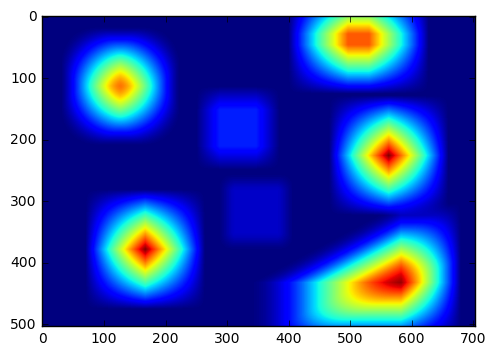

In [3]:
res1 = cv2.matchTemplate(img1,pat1,cv2.TM_CCORR)
plt.imshow(res1)
plt.show()

2.3

28227.0


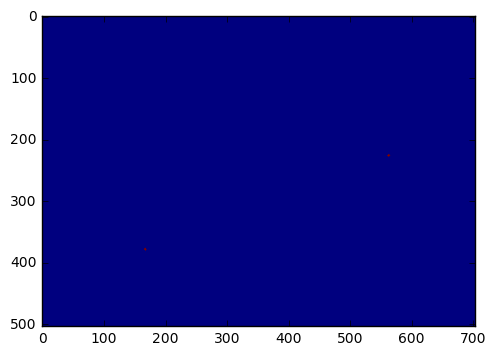

In [36]:
print np.amax(res1)
ret,thresh1 = cv2.threshold(res1,27600.0,28227.0,cv2.THRESH_BINARY)
plt.imshow(thresh1)

2.4
# H1
## H2

* bp1
**bold**


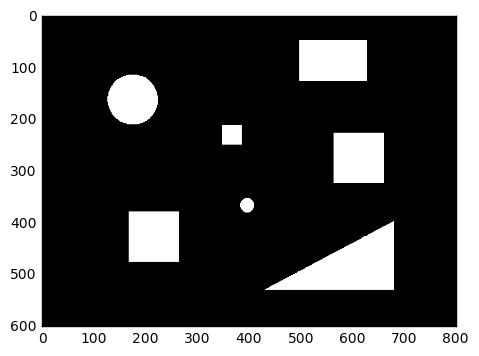

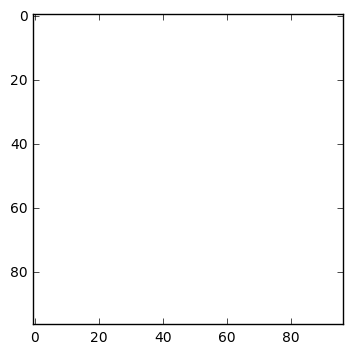

In [38]:
img2 = cv2.imread('image2.tif')
pat2 = cv2.imread('pattern2.tif')

img2_view = img1 * 255
pat2_view = pat1 * 255
plt.imshow(img2_view)
plt.show()
plt.imshow(pat2_view)
plt.show()